# THE GAME!

In [1]:
import itertools 
import copy
from sage.combinat.q_analogues import *
from sage.combinat.sf.sf import *
from sage.combinat.ncsf_qsym.qsym import *
from sage.rings.rational_field import *
from sage.combinat.subset import *
from sage.combinat.permutation import *
from sage.misc.latex import *

import sage.combinat.permutation as permutation
from sage.combinat.sf.macdonald import qt_kostka
from sage.combinat.sf.ns_macdonald import E
from sage.rings.polynomial.polydict import ETuple

from IPython.display import clear_output

coeffs_ring = ZZ['q','t']

q = coeffs_ring.gens()[0]
t = coeffs_ring.gens()[1]

coeffs_field = coeffs_ring.fraction_field()
R=PolynomialRing(coeffs_field,11,'x')
xs=list(R.gens())

sym = SymmetricFunctions(coeffs_field)
h = sym.homogeneous()
m = sym.monomial()
s = sym.schur()
e = sym.elementary()
p = sym.power()
Ht = sym.macdonald().Ht()
H = sym.macdonald().H()
MP = sym.macdonald().P()
W = sym.macdonald(t=0).P()
MJ = sym.macdonald().J()
HLP = sym.hall_littlewood(t).P()
HLQ = sym.hall_littlewood(t).Q();
HLQp = sym.hall_littlewood(t).Qp();
JJ = sym.jack().J()
qsym = QuasiSymmetricFunctions(coeffs_field)
F = qsym.Fundamental()
M = qsym.Monomial()
QS = qsym.QS()
YQS = qsym.YQS()

In [2]:
%run MultilineQueues.ipynb

# Preliminary Methods

In [3]:
# M is a multiline queue, k is a number to be inserted
def insert_num(M,k,player):
    current_balls = deepcopy(M.balls)
    n = len(current_balls[0])
    
    new_row = [[0,""] for i in range(n)]
    
    if(player == 0):
        new_row[k] = [1,"blue"]
    elif(player == 1):
        new_row[k] = [1,"red"]
    
    new_balls = deepcopy(current_balls + [new_row])
    M1 = MultilineQueue(new_balls)
    M1.pair(1)
    b1 = deepcopy(M1.balls)
    return(b1)


def is_empty(row,num_cols):
    ans = True
    for i in range(num_cols):
        if row[i] != [0,""]:
            ans = False
            break
    return(ans)
        
    
def are_there_four_in_a_row(row):
    n = len(row)
    ans = False
    rep = -1
    for i in range(n-3):
        if row[i] != 0:
            cons = [row[i+j] for j in range(4)]
            set_cons = Set(cons)
            if len(set_cons) == 1:
                ans = True
                rep = cons[0]
                break
        
    return([ans,rep])
        

def is_there_winner(mat):
    num_rows = len(mat)
    num_cols = len(mat[0])
    
    ans = False
    winner = -1
    
    # 1) Check rows
    for row in mat:
        [ans,winner] = are_there_four_in_a_row(row)
        if ans:
            return([ans,winner])
    
    # 2) Check columns
    
    if not ans:
        
        for i in range(num_cols):
            col = [mat[j][i] for j in range(num_rows)]
            [ans,winner] = are_there_four_in_a_row(col)
            if ans:
                return([ans,winner])
        
    # 3) Check diagonals
    
    if not ans:
        # First, diagonals with positive slope:
        
        # Case 1: along the rows:
        
        for i in range(num_rows):
            diag = [mat[i+j][j] for j in range(min([num_cols,num_rows-i]))]
            [ans,winner] = are_there_four_in_a_row(diag)
            if ans:
                return([ans,winner])
            
        # Case 2: along the columns:
        
        for i in range(num_cols):
            diag = [mat[j][i+j] for j in range(min([num_rows,num_cols-i]))]
            [ans,winner] = are_there_four_in_a_row(diag)
            if ans:
                return([ans,winner])
            
            
        # Second, diagonals with negative slope:
        
        # Case 1: along the rows:
        
        for i in range(num_rows):
            diag = [mat[i-j][j] for j in range(min([i+1,num_cols]))]
            [ans,winner] = are_there_four_in_a_row(diag)
            if ans:
                return([ans,winner])
            
        # Case 2: along the columns:
        
        for i in range(num_cols):
            diag = [mat[j][i-j] for j in range(min([i+1,num_rows]))]
            [ans,winner] = are_there_four_in_a_row(diag)
            if ans:
                return([ans,winner])
        
    
    return([ans,winner])

def get_matrix(balls):
    mat = []
    for i in range(len(balls)):
        new_row = [0 for i in range(len(balls[i]))]
        for j in range(len(balls[i])):
            b = balls[i][j]
            color = b[1]
            
            if color == "red":
                new_row[j] = 1
            elif color == "blue":
                new_row[j] = 2
            
        mat.append(new_row)
    
    return(mat)
                
    
####   GAME STARTER   ####
    
# num_cols is the number of columns of the game
def start():
    c = input("Number of columns for the game: ")
    num_cols = Integer(c)
    
    print("\n")
    
    r = 0.2
    b0 = [[[0,""] for i in range(num_cols)]]
    current_balls = b0
    
    cont = 0
    
    winner = False
    player_win = -1
    
    while not winner:  
            
        inp = input("Player "+str(cont%2+1)+": \n")
        k = Integer(inp)
        
        if(k <= num_cols):
            cont += 1
            player = cont%2
            
            M = MultilineQueue(current_balls)
            b = insert_num(M,k-1,player)
            current_balls = b

            for row in b:
                if is_empty(row,num_cols):
                    b.remove(row)

            Mf = MultilineQueue(b)
            Mf.pair(1)
            
            clear_output(wait=True)
            Mf.draw_board_game(r)

            current_balls = Mf.balls

            mat = get_matrix(current_balls)

            [winner,player_win] = is_there_winner(mat)
            
        else:
            print("Play with a number less than or equal to "+str(num_cols))
        
    if player_win == 1:
        print("Player 1 wins!")
    
    elif player_win == 2:
        print("Player 2 wins!")
        


# Plays a particular sequence of moves given by [moves]. moves[2i] is red, moves [2i+1] is blue in turn i-1
# c is the number of columns in the game. Make sure c is geq max(moves)
# show is binary to see if we want to plot the board
def play_moves(moves,c,show):
    num_cols = Integer(c)
    
    r = 0.2
    b0 = [[[0,""] for i in range(num_cols)]]
    current_balls = b0
    
    cont = 0
    
    player_win = -1
    
    for m in moves:  
            
        inp = m
        k = Integer(inp)
        
        if(k <= num_cols):
            cont += 1
            player = cont%2
            
            M = MultilineQueue(current_balls)
            b = insert_num(M,k-1,player)
            current_balls = b

            for row in b:
                if is_empty(row,num_cols):
                    b.remove(row)

            Mf = MultilineQueue(b)
            Mf.pair(1)
            
            if show:
                clear_output(wait=True)
                Mf.draw_board_game(r)

            current_balls = Mf.balls

            mat = get_matrix(current_balls)

            [winner,player_win] = is_there_winner(mat)
            
    return([player_win,current_balls])
            

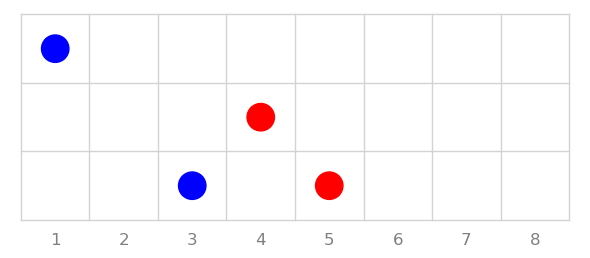

KeyboardInterrupt: Interrupted by user

In [4]:
start()

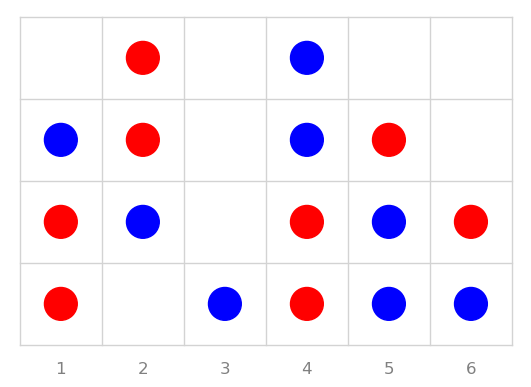

-1


In [16]:
moves = [1,3,4,5,1,2,4,5,2,6,6,1,2,4,5,4]
show = True

[winner,balls] = play_moves(moves,6,show)

print(winner)

In [24]:
def num_winners(M,turns):
    nums = range(1,M+1)
    somelists = [nums for j in range(2*turns)]
    plays = itertools.product(*somelists)

    cont_winners = 0
    
    p = list(plays)
    
    for move in p:
        [winner,balls] = play_moves(move,M,False)
        if winner != -1:
            cont_winners += 1
    
    return(cont_winners)

In [29]:
M = 3
turns = 5

print(num_winners(M,turns))

KeyboardInterrupt: 